## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

In [ ]:
#1: Regression is predicting a numeric outcome. Classification is predicting a categorical outcome.

#2: A confusion table is a cross-tabulation of predicted and actual values. It is one of the fundamental
# metrics for whether a classification model has done well or poorly.

#3: SSE stands for Sum of Squared Errors (or residuals), and it quantifies how far the model’s
# predictions are from the actual observed data.

#4: Underfitting occurs when your model is too simple to reliably explain the phenomenon
# you are interested in, and overfitting occurs when your model is too complex to
# reliably explain the phenomenon you are interested in.

#5: Splitting data into training and testing, then choosing k based on test performance, improves
# the model because it forces us to tune the model for generalization, making it perform well
# not just on the data we have, but on data we haven’t seen yet.]

#6: Reporting a class label is simple, efficient, and easy to act on, but it hides the model’s
# confidence and can be misleading. Reporting a probability distribution provides richer
# information about uncertainty, supports flexible decision-making and better evaluation, but is harder
# to interpret and may suffer from calibration issues.


**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [5]:
#1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/USA_cars_datasets.csv',low_memory=False)

# Keep only the relevant columns
df = df[['price', 'year', 'mileage']]

# Check for missing values (NAs)
na_counts = df.isna().sum()

# Look at the head and dimensions
print(df.head())
print("Shape:", df.shape)
print("Missing values:\n", na_counts)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Shape: (2499, 3)
Missing values:
 price      0
year       0
mileage    0
dtype: int64


In [7]:
#2

from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool

# Define the function
def maxmin(z):
    return (z - z.min()) / (z.max() - z.min())

# Apply to the features
df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

# Check results
print(df.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [8]:
#3
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df[['year', 'mileage']]
y = df['price']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check dimensions
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (1999, 2) (1999,)
Test set: (500, 2) (500,)


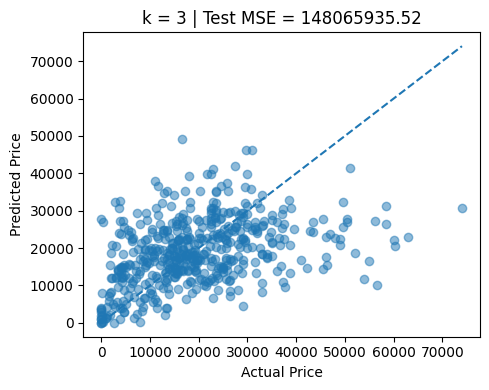

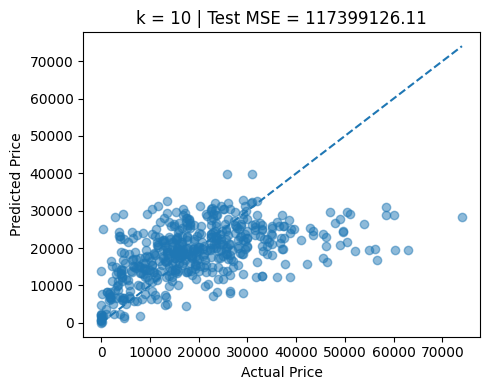

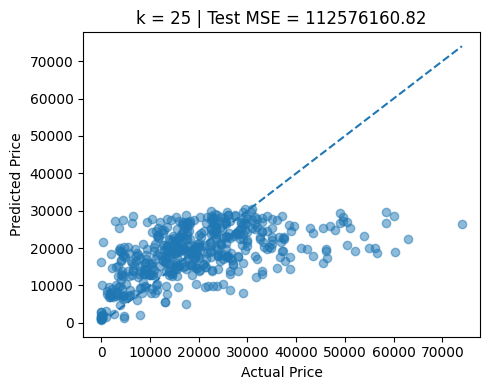

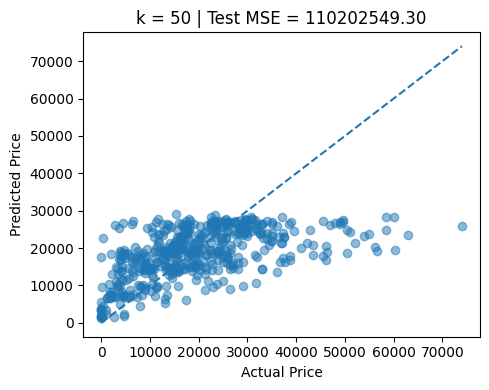

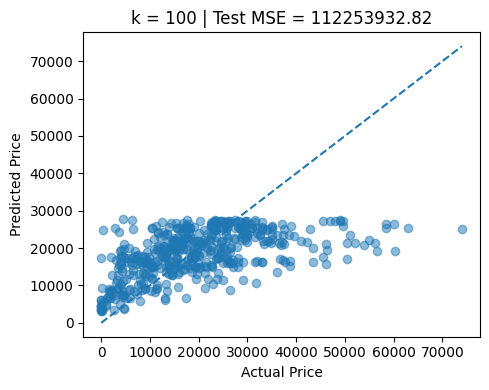

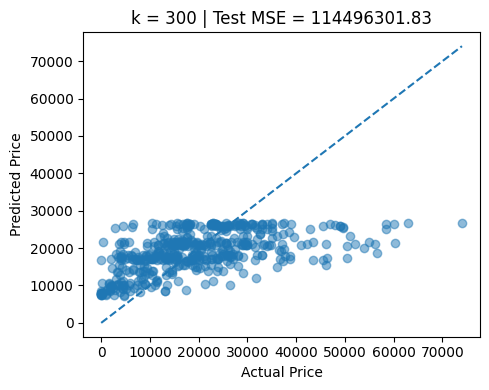

Test MSE by k:
k=  3: 148065935.52
k= 10: 117399126.11
k= 25: 112576160.82
k= 50: 110202549.30
k=100: 112253932.82
k=300: 114496301.83


In [10]:
#4

from sklearn.metrics import mean_squared_error # Import mean_squared_error
# k values to evaluate
k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    # Scatter: Actual vs Predicted with 45° reference line
    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    lo, hi = y_test.min(), y_test.max()
    plt.plot([lo, hi], [lo, hi], linestyle="--")  # 45° line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k} | Test MSE = {mse:.2f}")
    plt.tight_layout()
    plt.show()

# Print MSE table
print("Test MSE by k:")
for k, mse in mse_results.items():
    print(f"k={k:>3}: {mse:.2f}")

#As k increases, the values become closer together in values on the Y axis.

In [11]:
#5

# Find k with lowest MSE
best_k = min(mse_results, key=mse_results.get)
print(f"Optimal k: {best_k}, with Test MSE = {mse_results[best_k]:.2f}")

Optimal k: 50, with Test MSE = 110202549.30


In [ ]:
#6
#With small k, the plots showed overfitting: predictions were noisy and closely followed
# individual points. With very large k, the plots showed underfitting: predictions collapsed
# toward the mean, missing extremes. At the optimal k=50, the scatter best balanced these effects,
# tracking the overall trend without too much noise.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.